# Exercise 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 7.2

## Exercise 7.4

In [14]:
gdr_liquid_MC = np.loadtxt("./Liquid/MC/output_gdr.dat")
gdr_liquid_MD = np.loadtxt("./Liquid/MD/output_gdr.dat")

Text(0.5, 1.0, 'g(r) for a liquid')

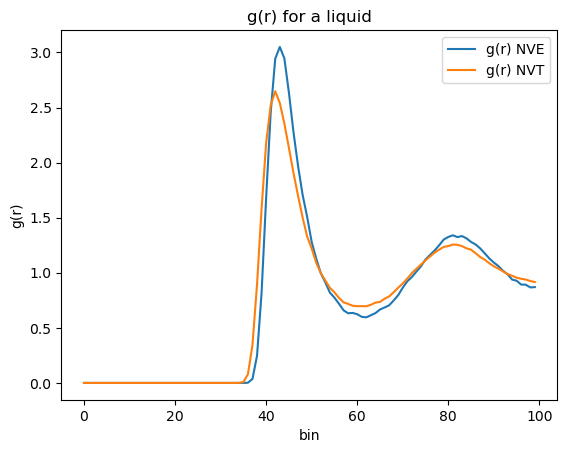

In [19]:
plt.plot(gdr_liquid_MD[-1], label = "g(r) NVE")
plt.plot(gdr_liquid_MC[-1], label = "g(r) NVT")
plt.legend()
plt.ylabel("g(r)")
plt.xlabel("bin")
plt.title("g(r) for a liquid")